<a href="https://colab.research.google.com/github/MyPham1207/Python_for_ML/blob/main/Assignments/Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Mounted at /content/drive


#1. 1-Linear Regression

In [2]:
data = pd.read_csv('/content/drive/MyDrive/School/Python_for_ML/Assignment_8/Data/Salary_Data.csv')
# shuffle the data just for randomness
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,6.8,91738.0
2,3.2,54445.0
3,8.7,109431.0
4,3.0,60150.0


In [3]:
# Split the data
n_splits = 5
kf = KFold(n_splits)
train_index = []
test_index = []
for train, test in kf.split(data):
  train_index.append(train)
  test_index.append(test)

In [4]:
# Take train data and test data from index above
train_data = []
test_data = []
for i in range(n_splits):
  train_data.append(data.iloc[train_index[i]])
  test_data.append(data.iloc[test_index[i]])

train_data[0].head()

,YearsExperience,Salary
6,10.5,121872.0
7,10.3,122391.0
8,8.2,113812.0
9,4.0,55794.0
10,1.5,37731.0


In [5]:
# Normalize the data, fit train and transform train, test
norm_train_data = []
norm_test_data = []
for i in range(n_splits): 
  scaler = MinMaxScaler()
  transformer = scaler.fit(train_data[i])
  train_temp = pd.DataFrame(transformer.transform(train_data[i]), columns=train_data[i].columns, index=train_data[i].index) 
  test_temp = pd.DataFrame(transformer.transform(test_data[i]), columns=test_data[i].columns, index=test_data[i].index)
  norm_train_data.append(train_temp)
  norm_test_data.append(test_temp)

norm_train_data[0].head()

,YearsExperience,Salary
6,1.000000,0.993870
7,0.978261,1.000000
8,0.750000,0.898665
9,0.293478,0.213359
10,0.021739,0.000000


In [6]:
# This function will help me see my hypotasis line
def plot(Xtest, ytest, ypred):
  plt.scatter(Xtest, ytest, color="black")
  plt.plot(Xtest, ypred, color="blue", linewidth=3)

  plt.xticks(())
  plt.yticks(())

  plt.show()

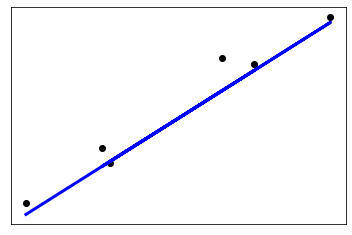

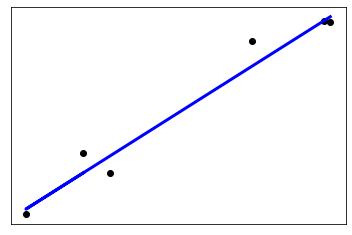

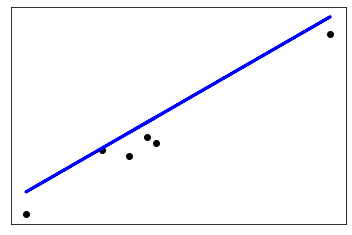

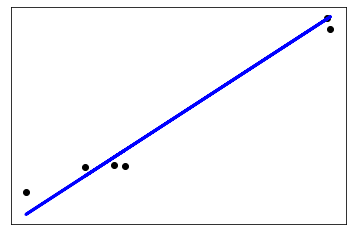

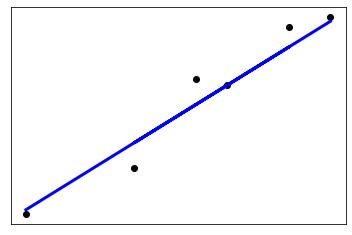

Average Mean Squared Error:  0.00539008834744673


In [7]:
# For regression problem I use mean_squared_error to calculate the lost
error = 0
model = LinearRegression()
for i in range(n_splits):
  y_pred = model.fit(norm_train_data[i][['YearsExperience']], np.ravel(norm_train_data[i][['Salary']])).predict(norm_test_data[i][['YearsExperience']])
  y_test = np.ravel(norm_test_data[i][['Salary']])
  plot(norm_test_data[i][['YearsExperience']], y_test, y_pred)
  err = mean_squared_error(y_test, y_pred)
  error += err
print('Average Mean Squared Error: ', error / n_splits)

#2. N-Linear Regression

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
data = pd.read_csv('/content/drive/MyDrive/School/Python_for_ML/Assignment_8/Data/50_Startups.csv')
# shuffle the data just for randomness
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,120542.52,148718.95,311613.29,New York,152211.77
1,61136.38,152701.92,88218.23,New York,97483.56
2,134615.46,147198.87,127716.82,California,156122.51
3,55493.95,103057.49,214634.81,Florida,96778.92
4,38558.51,82982.09,174999.30,California,81005.76


In [11]:
temp = data[['Profit']]
data = pd.get_dummies(data, columns=['State'])
data = data.drop(columns=['Profit'])
data = pd.concat((data, temp), axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,120542.52,148718.95,311613.29,0,0,1,152211.77
1,61136.38,152701.92,88218.23,0,0,1,97483.56
2,134615.46,147198.87,127716.82,1,0,0,156122.51
3,55493.95,103057.49,214634.81,0,1,0,96778.92
4,38558.51,82982.09,174999.30,1,0,0,81005.76


In [26]:
# columns have continuous values
conTag = list(data.columns[:3])
conTag.append('Profit')
# columns have uncontinuous values
unconTag = list(data.columns[3:len(data.columns) - 1])
unconTag

['State_California', 'State_Florida', 'State_New York']

In [12]:
# Split the data
n_splits = 5
kf = KFold(n_splits)
train_index = []
test_index = []
for train, test in kf.split(data):
  train_index.append(train)
  test_index.append(test)

In [13]:
train_data = []
test_data = []
for i in range(n_splits):
  train_data.append(data.iloc[train_index[i]])
  test_data.append(data.iloc[test_index[i]])

test_data[0].head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,120542.52,148718.95,311613.29,0,0,1,152211.77
1,61136.38,152701.92,88218.23,0,0,1,97483.56
2,134615.46,147198.87,127716.82,1,0,0,156122.51
3,55493.95,103057.49,214634.81,0,1,0,96778.92
4,38558.51,82982.09,174999.30,1,0,0,81005.76


In [ ]:
# # As you can see, my data have 'State' column contain string value, 
# # I have to turn it to number but I can't make it comparable, 
# # that's why I encode each value to one hot vector
# for i in range(n_splits):
#   one_hot = OneHotEncoder(handle_unknown='ignore')
#   one_hot = one_hot.fit(train_data[i][['State']])

#   # Set index=train_index[i] to make sure the rows in train_temp (which contain one hot vector of state column of train_data[i]) 
#   # correspond to ones in train_data[i]
#   train_temp = pd.DataFrame(one_hot.transform(train_data[i][['State']]).toarray(), index=train_index[i])
#   train_temp.columns = list(one_hot.categories_[0])
#   # These 2 lines just to replace 'State' column with one_hot columns
#   train_temp = pd.concat((train_data[i][['R&D Spend', 'Administration', 'Marketing Spend']], train_temp), axis=1)
#   train_data[i] = pd.concat((train_temp, train_data[i][['Profit']]), axis=1)

#   test_temp = pd.DataFrame(one_hot.transform(test_data[i][['State']]).toarray(), index=test_index[i])
#   test_temp.columns = list(one_hot.categories_[0])
#   test_temp = pd.concat((test_data[i][['R&D Spend', 'Administration', 'Marketing Spend']], test_temp), axis=1)
#   test_data[i] = pd.concat((test_temp, test_data[i][['Profit']]), axis=1)

# test_data[0].head()

In [27]:
norm_train_data = []
norm_test_data = []
for i in range(n_splits): 
  scaler = MinMaxScaler()
  transformer = scaler.fit(train_data[i][conTag])

  train_temp = pd.DataFrame(transformer.transform(train_data[i][conTag]), columns=train_data[i][conTag].columns, index=train_data[i][conTag].index) 
  temp = train_temp[['Profit']]
  train_temp = train_temp.drop(columns=['Profit'])
  train_temp = pd.concat((train_temp, train_data[i][unconTag]), axis=1)
  train_temp = pd.concat((train_temp, temp), axis=1)

  test_temp = pd.DataFrame(transformer.transform(test_data[i][conTag]), columns=test_data[i][conTag].columns, index=test_data[i][conTag].index)
  temp = test_temp[['Profit']]
  test_temp = test_temp.drop(columns=['Profit'])
  test_temp = pd.concat((test_temp, test_data[i][unconTag]), axis=1)
  test_temp = pd.concat((test_temp, temp), axis=1)

  norm_train_data.append(train_temp)
  norm_test_data.append(test_temp)

norm_test_data[0].head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,0.729018,0.741733,0.660500,0,0,1,0.774468
1,0.369741,0.772053,0.186989,0,0,1,0.466280
2,0.814128,0.730161,0.270710,1,0,0,0.796490
3,0.335617,0.394134,0.454943,0,1,0,0.462312
4,0.233194,0.241309,0.370931,1,0,0,0.373489


In [29]:
col = list(train_data[0].columns)
X_tag = col[0:len(col) - 1]
y_tag = [col[len(col) - 1]]
X_tag, y_tag

(['R&D Spend',
  'Administration',
  'Marketing Spend',
  'State_California',
  'State_Florida',
  'State_New York'],
 ['Profit'])

In [30]:
error = 0
model = LinearRegression()
for i in range(n_splits):
  y_pred = model.fit(norm_train_data[i][X_tag], np.ravel(norm_train_data[i][y_tag])).predict(norm_test_data[i][X_tag])
  y_test = np.ravel(norm_test_data[i][y_tag])
  err = mean_squared_error(y_test, y_pred)
  error += err
print('Average Mean Squared Error: ', error / n_splits)

Average Mean Squared Error:  0.004340979416055142
